<a href="https://colab.research.google.com/github/preetidhyani92/Employee-attribution/blob/main/notebook/AttritionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()


Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn


In [3]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


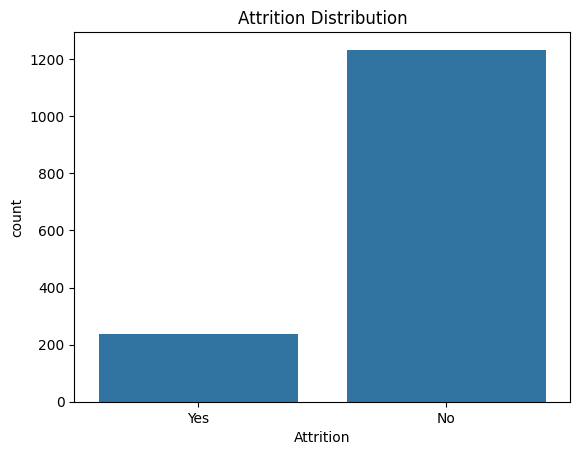

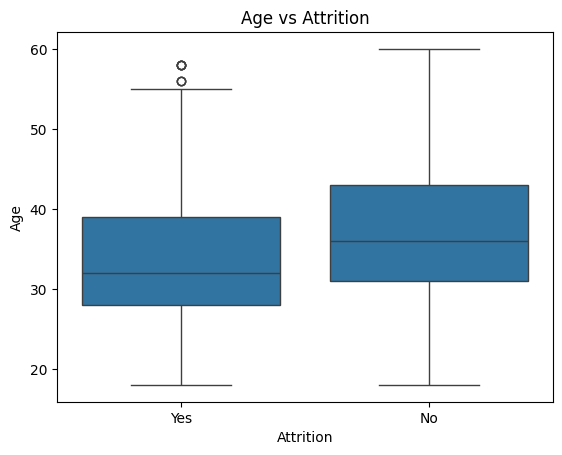

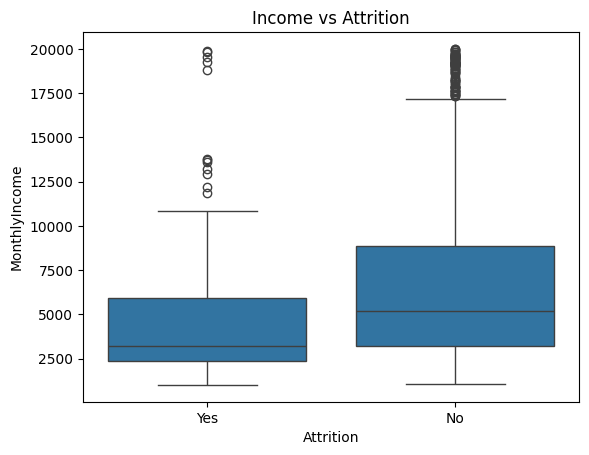

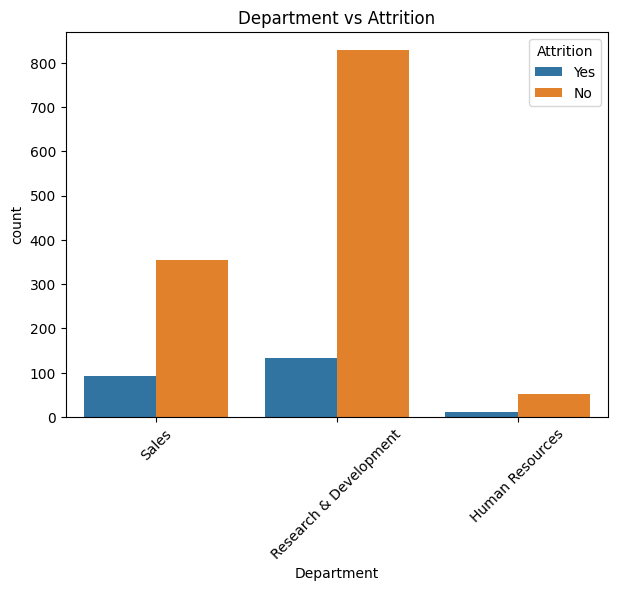

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

# Attrition by Age
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title("Age vs Attrition")
plt.show()

# Attrition by Monthly Income
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Income vs Attrition")
plt.show()

# Attrition by Department
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Department vs Attrition")
plt.show()


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Attrition_Yes", axis=1)
y = df_encoded["Attrition_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)


In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {"Logistic Regression": log_reg,
          "Random Forest": rf,
          "XGBoost": xgb}

for name, model in models.items():
    print("\nModel:", name)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.7880434782608695
              precision    recall  f1-score   support

       False       0.89      0.85      0.87       309
        True       0.37      0.47      0.42        59

    accuracy                           0.79       368
   macro avg       0.63      0.66      0.64       368
weighted avg       0.81      0.79      0.80       368


Model: Random Forest
Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       309
        True       0.42      0.22      0.29        59

    accuracy                           0.83       368
   macro avg       0.64      0.58      0.59       368
weighted avg       0.79      0.83      0.80       368


Model: XGBoost
Accuracy: 0.842391304347826
              precision    recall  f1-score   support

       False       0.88      0.94      0.91       309
        True       0.51      0.32      0.40        59

    accuracy                  

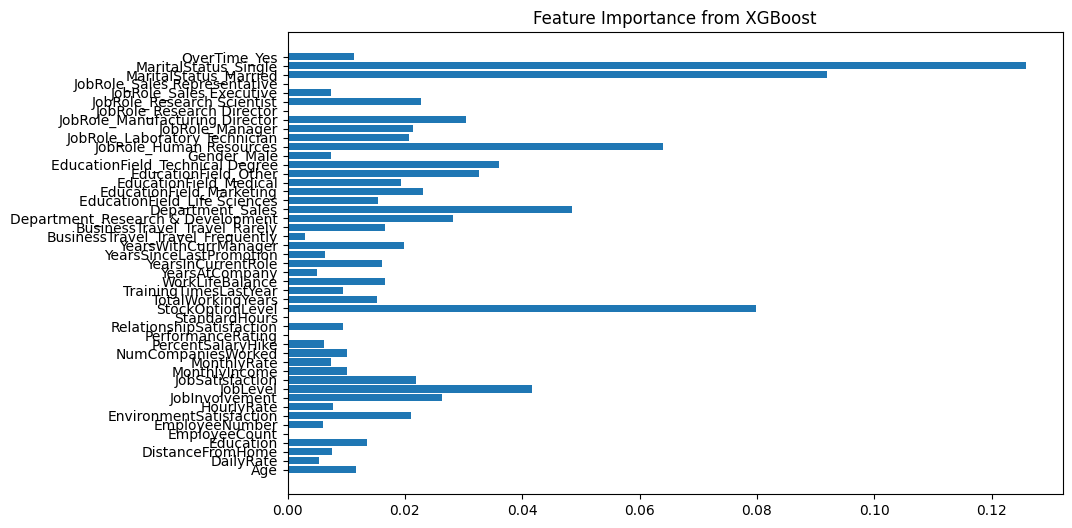

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title("Feature Importance from XGBoost")
plt.show()


In [14]:
df.to_csv("cleaned_data.csv", index=False)
from google.colab import files
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>